In [6]:
from datetime import datetime
from time import sleep
import time

In [7]:
init_time = datetime.now()
sleep(0.1)
now = datetime.now()
dt = now - init_time
dt_in_ms = dt.seconds *1000 + dt.microseconds / 1000

In [8]:
dt_in_ms

1001.149

In [9]:
tt = time.localtime()

In [10]:
tt

time.struct_time(tm_year=2023, tm_mon=1, tm_mday=5, tm_hour=11, tm_min=35, tm_sec=23, tm_wday=3, tm_yday=5, tm_isdst=0)

In [13]:
current_time = time.strftime("%Y_%m_%d_%H_%M_%S", tt)

In [14]:
current_time

'2023_01_05_11_35_23'

[[12.991339, 26.343584, -0.54081], [16.289434, -7.143974, -4.373655], [3.115073, 3.717124, 21.611605], [-25.590439, 8.193016, -6.679047], [-6.805401, -31.109989, -10.018099]]
x:
[0, -41, 20, -10, -10]
x2:
[12.991339, 16.289434, 3.115073, -25.590439, -6.805401]


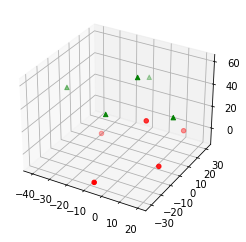

In [24]:
#%% import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from pyquaternion import Quaternion
import csv


#%% transformation optitrack tracker to real tracker
path_csv = "/home/robotlab/Documents/GitHub/MA_Schote/MA/Data"

def get_opti_positions(filename):
    path = path_csv + "/" + filename
    opti_positions = []
    with open(path, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[0] == 'Name':
                name = row[1]
            if row[0] == 'Point':
                opti_positions.append([])
                for i in range(2,5):
                    opti_positions[-1].append(float(row[i]))

    return name, opti_positions
	
def plot_ply(tracker_points, opti_points, n):
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    x, y, z = [], [], []
    x2, y2, z2 = [], [], []
    for i in range(0,n):
            x.append(tracker_points[i][0])
            y.append(tracker_points[i][1])
            z.append(tracker_points[i][2])
    ax.scatter(x,y,z,c='g', marker='^')
    print('x:')
    print(x)
    for i in range(0,n):
            x2.append(opti_points[i][0])
            y2.append(opti_points[i][1])
            z2.append(opti_points[i][2])
    print('x2:')
    print(x2)
    ax.scatter(x2,y2,z2, c='r', marker='o')
    plt.show()




class Tracker_3dicke:
    numTrackers = 5
    positions = [[0, 0, 75], [-42, 0, 46], [25, 0, 46], [0, 37, 41.5], [0, -44, 41.5]] # [x,y,z,x2,y2,z2,...]
    name, opti_positions = get_opti_positions('MakerJS_3dicke.csv')

class Tracker_Nico:
    numTrackers = 5
    positions = [[0, 0, 61], [-41, 0, 35], [20, 0, 35], [-10, 31, 35], [-10, -14, 35]] # [x,y,z,x2,y2,z2,...]
    name, opti_positions = get_opti_positions('Tracker Nico.csv')


#%% asd
if __name__ == '__main__':
    print(Tracker_Nico.opti_positions)
    plot_ply(Tracker_Nico.positions, Tracker_Nico.opti_positions, Tracker_Nico.numTrackers)

In [25]:
Tracker_Nico.opti_positions

[[12.991339, 26.343584, -0.54081],
 [16.289434, -7.143974, -4.373655],
 [3.115073, 3.717124, 21.611605],
 [-25.590439, 8.193016, -6.679047],
 [-6.805401, -31.109989, -10.018099]]

In [82]:
import math
def get_min_max_dis(points, n):
    diff = []
    comp = [0,0,0]
    v_comp_max = 0
    v_comp_min = 100000000000000
    for i in range(n):
        print('i:', i)
        for j in range(n-1,-1+i,-1):
            if j != i:
                print('    j:', j)
                dx = points[j][0] - points[i][0]
                dy = points[j][1] - points[i][1]
                dz = points[j][2] - points[i][2]
                diff.append([dx,dy,dz])
    print(diff)
    for i in range(len(diff)):
        v_diff= math.sqrt(diff[i][0]**2+diff[i][1]**2+diff[i][2]**2)
        
        if v_diff > v_comp_max:
            d_max = i
            v_comp_max = v_diff
        if v_diff < v_comp_min:
            d_min = i
            v_comp_min = v_diff
            
    return diff[d_max], diff[d_min]

In [91]:
import math
def get_min_max_dis(points, n):
    diff = []
    comp = [0,0,0]
    v_comp_max = 0
    v_comp_min = 100000000000000
    for i in range(n):
        print('i:', i)
        for j in range(n-1,-1+i,-1):
            if j != i:
                print('    j:', j)
                dx = points[j][0] - points[i][0]
                dy = points[j][1] - points[i][1]
                dz = points[j][2] - points[i][2]
                
                v_diff= math.sqrt(dx**2+dy**2+dz**2)
        
                if v_diff > v_comp_max:
                    v_max = [points[j], points[i]]
                    v_comp_max = v_diff
                    print('v_max:', v_max, 'mit d =', v_comp_max)
                if v_diff < v_comp_min:
                    v_min = [points[j], points[i]]
                    v_comp_min = v_diff
                    print('v_min:', v_min, 'mit d =', v_comp_min)
    return v_max, v_min

In [92]:
get_min_max_dis(Tracker_Nico.opti_positions, 5)

i: 0
    j: 4
v_max: [[-6.805401, -31.109989, -10.018099], [12.991339, 26.343584, -0.54081]] mit d = 61.50319481037916
v_min: [[-6.805401, -31.109989, -10.018099], [12.991339, 26.343584, -0.54081]] mit d = 61.50319481037916
    j: 3
v_min: [[-25.590439, 8.193016, -6.679047], [12.991339, 26.343584, -0.54081]] mit d = 43.077542476702135
    j: 2
v_min: [[3.115073, 3.717124, 21.611605], [12.991339, 26.343584, -0.54081]] mit d = 33.16966705540743
    j: 1
i: 1
    j: 4
    j: 3
    j: 2
v_min: [[3.115073, 3.717124, 21.611605], [16.289434, -7.143974, -4.373655]] mit d = 31.09278010714907
i: 2
    j: 4
    j: 3
i: 3
    j: 4
i: 4


([[-6.805401, -31.109989, -10.018099], [12.991339, 26.343584, -0.54081]],
 [[3.115073, 3.717124, 21.611605], [16.289434, -7.143974, -4.373655]])

In [93]:
get_min_max_dis(Tracker_Nico.positions, 5)

i: 0
    j: 4
v_max: [[-10, -14, 35], [0, 0, 61]] mit d = 31.176914536239792
v_min: [[-10, -14, 35], [0, 0, 61]] mit d = 31.176914536239792
    j: 3
v_max: [[-10, 31, 35], [0, 0, 61]] mit d = 41.677331968349414
    j: 2
    j: 1
v_max: [[-41, 0, 35], [0, 0, 61]] mit d = 48.54894437575342
i: 1
    j: 4
    j: 3
    j: 2
v_max: [[20, 0, 35], [-41, 0, 35]] mit d = 61.0
i: 2
    j: 4
    j: 3
i: 3
    j: 4
i: 4


([[20, 0, 35], [-41, 0, 35]], [[-10, -14, 35], [0, 0, 61]])

In [90]:
get_min_max_dis([[0,0,0],[1,0,0], [1.5,0,0]], 3)

i: 0
    j: 2
v_max: [[1.5, 0, 0], [0, 0, 0]] mit 1.5
v_min: [[1.5, 0, 0], [0, 0, 0]] mit 1.5
    j: 1
v_min: [[1, 0, 0], [0, 0, 0]] mit 1.0
i: 1
    j: 2
v_min: [[1.5, 0, 0], [1, 0, 0]] mit 0.5
i: 2


([[1.5, 0, 0], [0, 0, 0]], [[1.5, 0, 0], [1, 0, 0]])